# Company Stock and Invetment Project

# Time Series

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

1. Importing Libraries for time series forecasting

2. Data Preprocessing

3. Data Visualization

    a. Density Plot

    b. Autocorrelation Plot

    c. ACF and PACF Plots

4. Time-series decompositon

5. Stationarity Test

6. Fitting ARIMA Model

7. Fitting SARIMA Model

    a. Plot_diagnostics

    b. Prediction and Forecasting using SARIMA

    c. Prediction and Forecasting Plots

# Importing Libraries for time series forecasting

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np

from pandas import Series

from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pylab import rcParams

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
%matplotlib inline
import datetime

import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


import warnings
warnings.filterwarnings("ignore")

Importing data Company Stock and Invetment

In [2]:
#importing data

comp_stocks=pd.read_csv('Company_Stock_and_Investment.csv')
comp_stocks

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


# Data Preprocessing

In [3]:
#data types of columns level

comp_stocks.dtypes

Date                        object
Oil Investments            float64
Gold Investments           float64
Comp Stock                 float64
Other sharesInvestments    float64
dtype: object

In [4]:
#data info of columns

comp_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1984 non-null   object 
 1   Oil Investments          1984 non-null   float64
 2   Gold Investments         1984 non-null   float64
 3   Comp Stock               1984 non-null   float64
 4   Other sharesInvestments  1984 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [5]:
#finding the null values in the columns

comp_stocks.isnull().any()

Date                       False
Oil Investments            False
Gold Investments           False
Comp Stock                 False
Other sharesInvestments    False
dtype: bool

In [6]:
# Set Date column to datetime for time series

comp_stocks['Date'] = pd.to_datetime(comp_stocks['Date'])
comp_stocks.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [7]:
# Data is sorted from most recent date to the past so sorting by date to go the other way around

comp_stocks = comp_stocks.sort_values(by='Date', ascending=True)
comp_stocks

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
20,2010-01-02,0.021414,0.007418,0.013902,-0.052149
39,2010-01-03,-0.012669,0.005188,0.021357,0.051858
62,2010-01-04,0.012942,0.007172,0.004128,-0.029167
103,2010-01-06,-0.017568,0.016770,0.015377,-0.017695
...,...,...,...,...,...
1853,2017-12-05,0.000418,0.006622,0.013966,0.014489
1873,2017-12-06,0.006111,-0.000118,-0.023896,-0.013697
1894,2017-12-07,0.009321,0.006399,0.001443,0.012453
1937,2017-12-09,0.003121,-0.005771,-0.003963,0.004724


In [8]:
# Resetting the index due to the sort_value change

comp_stocks = comp_stocks.reset_index(drop = True)
comp_stocks.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-02,0.021414,0.007418,0.013902,-0.052149
2,2010-01-03,-0.012669,0.005188,0.021357,0.051858
3,2010-01-04,0.012942,0.007172,0.004128,-0.029167
4,2010-01-06,-0.017568,0.016770,0.015377,-0.017695


In [9]:
# Dropping all columns except for Oil Investments

cols = ['Oil Investments', 'Gold Investments', 'Other sharesInvestments']
comp_stocks.drop(cols, axis = 1, inplace = True)
comp_stocks.head()

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-01-02,0.013902
2,2010-01-03,0.021357
3,2010-01-04,0.004128
4,2010-01-06,0.015377


In [10]:
#Changing the column name for beetter understanding

comp_stocks.columns = ["date","stocks"]

In [11]:
#Setting index as the datetime column for easier manipulations

comp_stocks = comp_stocks.set_index('date')

# Data Visualization

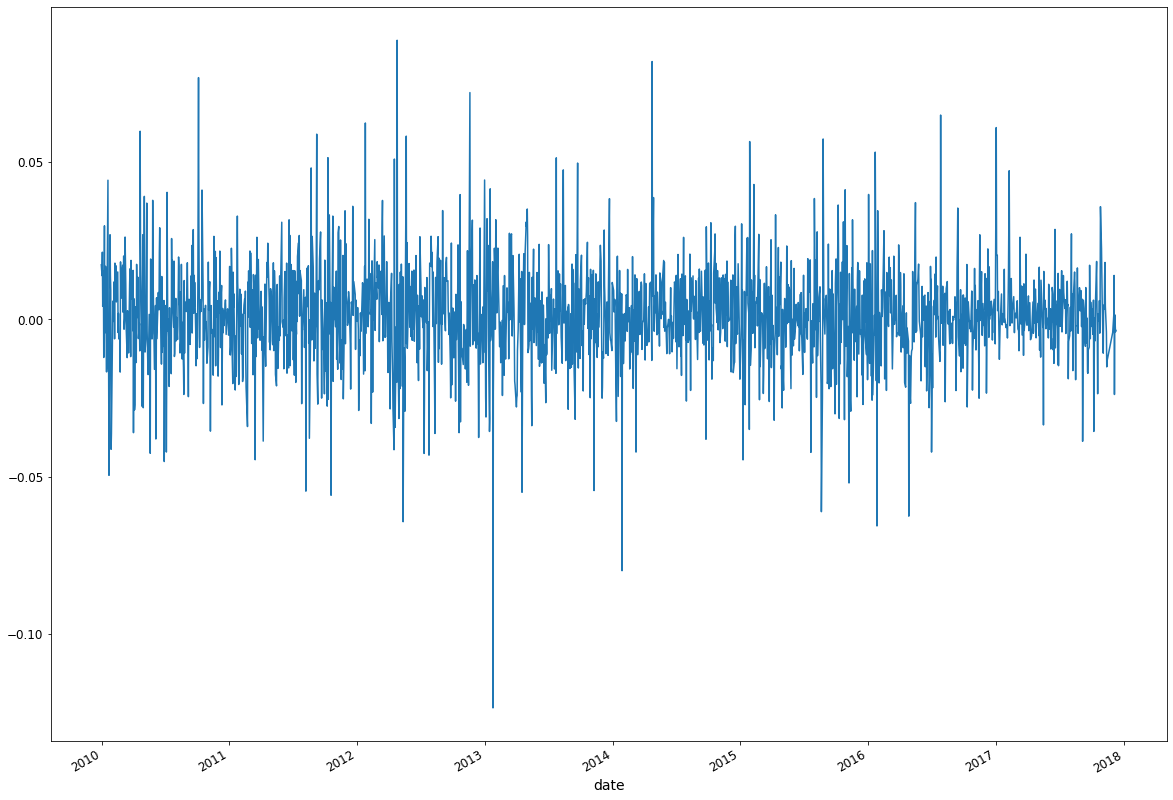

In [12]:
# Simple plot of historical data

comp_stocks['stocks'].plot(figsize=(20,15));

# Density Plot

Reviewing plots of the density of observations can provide further insight into the structure of the data:

The distribution ranges from -0.08 to 0.05

Transformations might be useful prior to modelling.

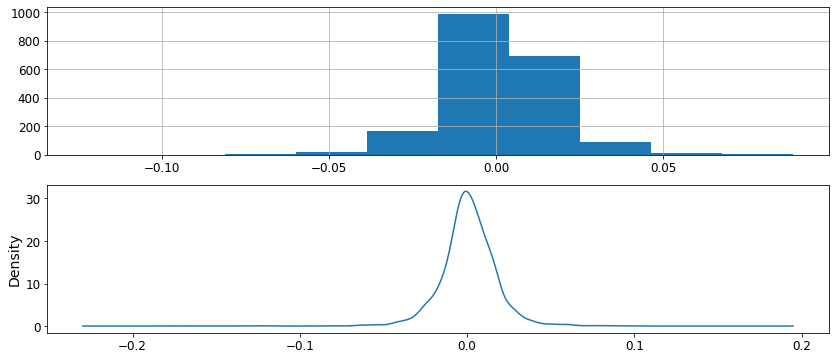

In [13]:
#import Series

plt.figure(figsize=(14,6))
plt.figure(1)
plt.subplot(211)
comp_stocks.stocks.hist()
plt.subplot(212)
comp_stocks.stocks.plot(kind='kde')
plt.show()

# Autocorrelation Plots

Autocorrelation plots are a commonly-used tool for checking randomness in a data set.

This randomness is ascertained by computing autocorrelations for data values at varying time lags.

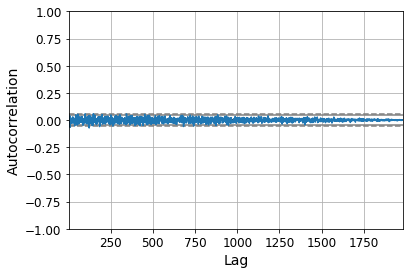

In [14]:
#from pandas importing  autocorrelation_plot

autocorrelation_plot(comp_stocks['stocks'],)
plt.show()

# ACF and PACF Plots

Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.

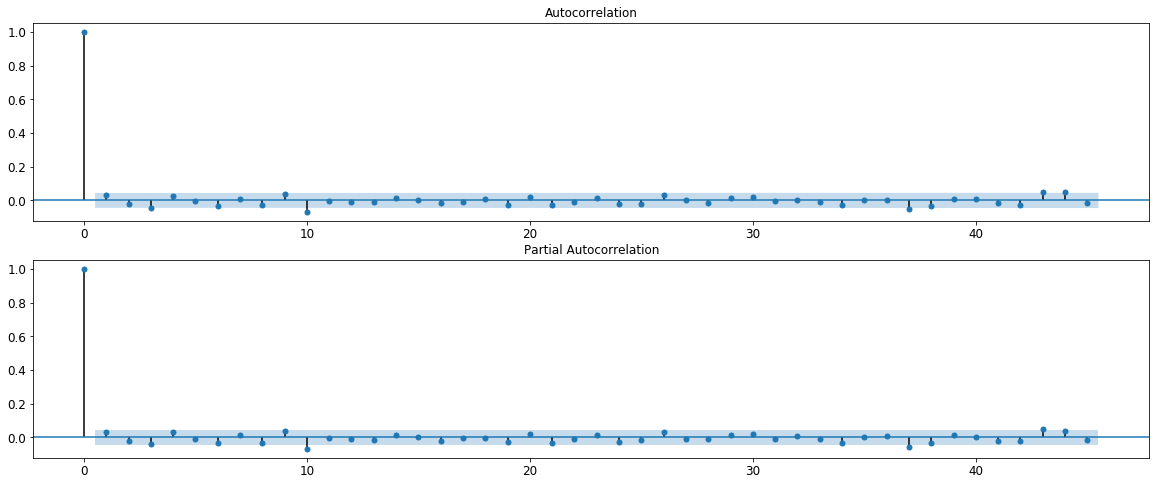

In [15]:
#from statsmodels.graphics.tsaplots importing plot_acf to plot Autocorrelation Function (ACF) 
#from statsmodels.graphics.tsaplots importing plot_pacf to plot Partial Autocorrelation Function (PACF) 

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(comp_stocks['stocks'],lags=45, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(comp_stocks['stocks'],lags=45, ax=ax2)

# Time-series decompositon

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

Resampling the time series data based on months 'M' indicates month

In [16]:
# Resampling the time series data based on months 
# 'M' indicates month 

y = comp_stocks['stocks'].resample('M').mean()

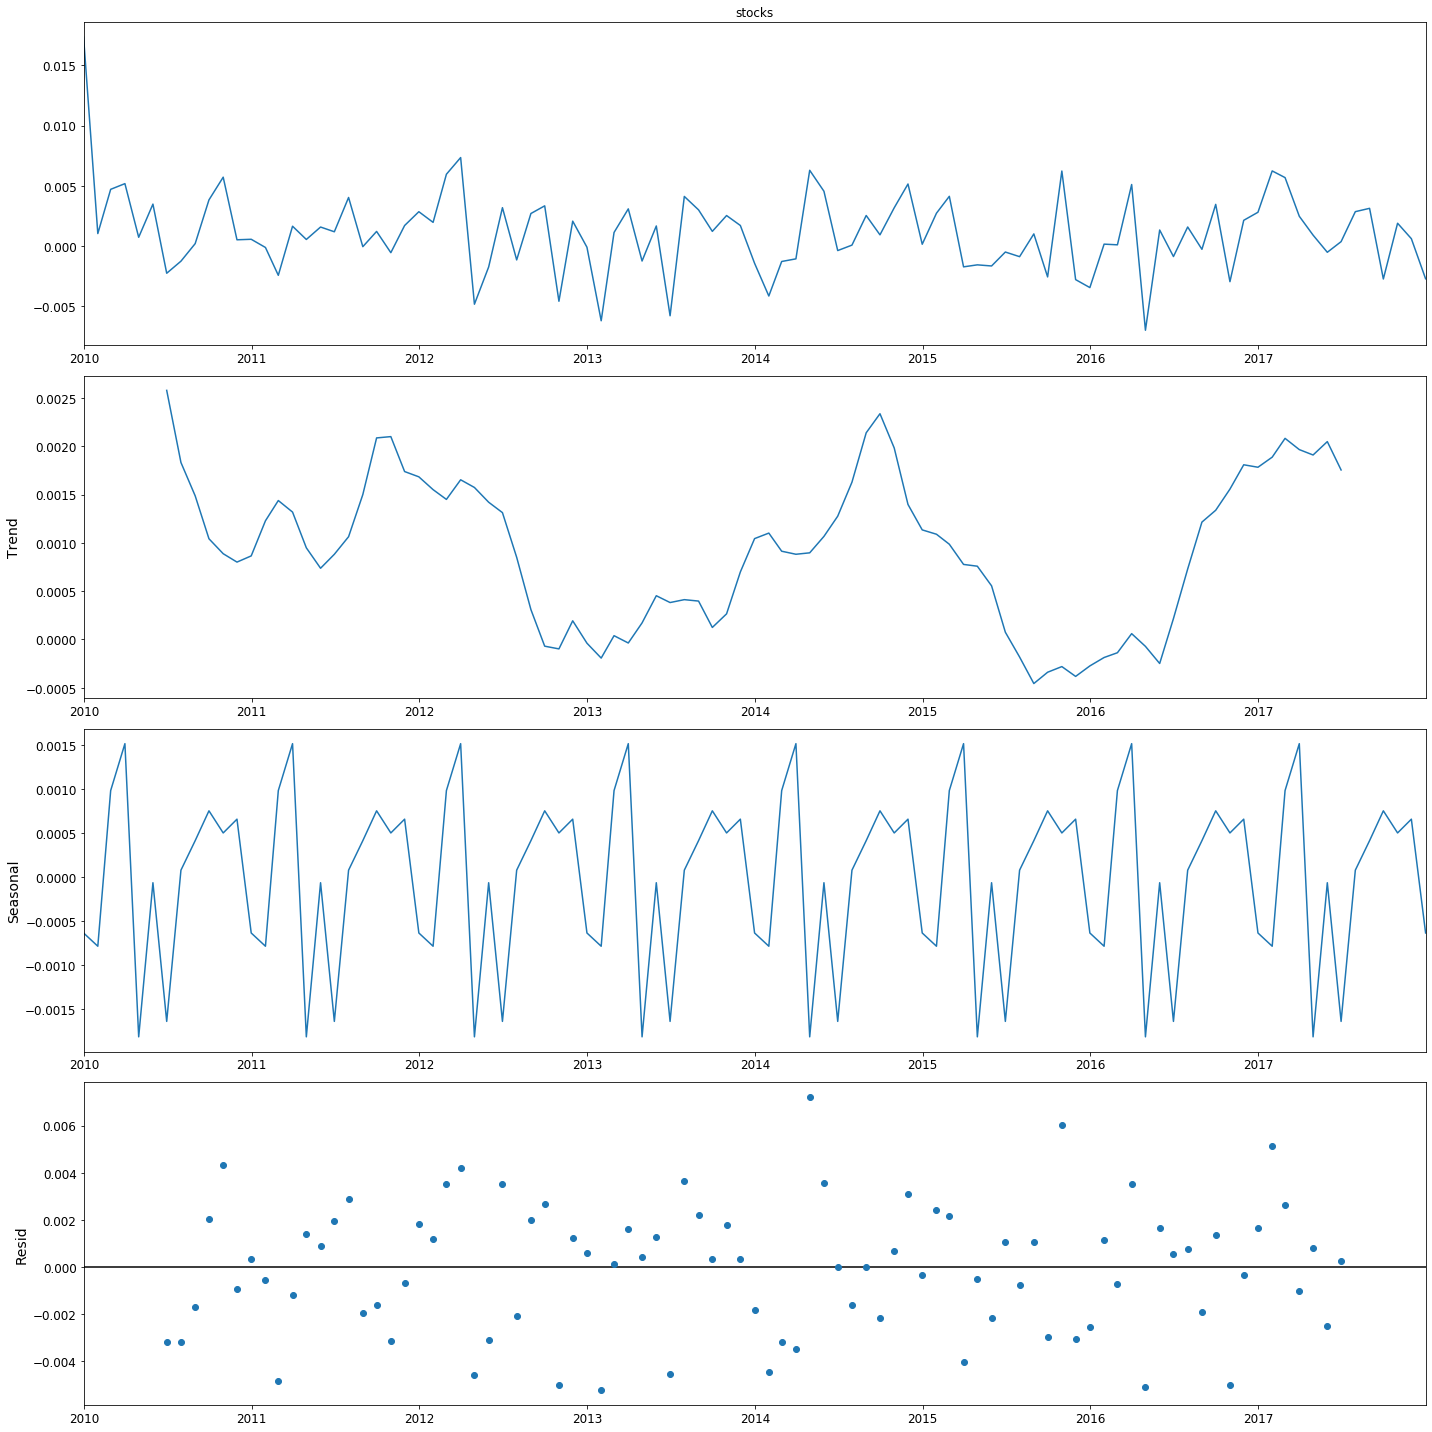

In [17]:
#from pylab importing rcParams to plot Time-series decompositon

rcParams['figure.figsize'] = 20, 20

decomposition = sm.tsa.seasonal_decompose(y, model='additive',freq=12)
fig = decomposition.plot()
plt.show()

# Stationarity Test for time series

Using Augmented Dickey-Fuller(ADF) Test

Null Hypothesis : Time series has a unit root - It is non-stationary

Alternate Hypothesis : Time series does not have a unit root - It is stationary

In [18]:
#HO: It is non stationary
#H1: It is stationary

#from statsmodels.tsa.stattools importing adfuller to get the following output

def opa(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
    if result[1] <= 0.05:
        print("\n Strong evidence against the null hypothesis(HO), reject the null hypothesis. Data  is stationary")
    else:
        print("\n weak evidence against null hypothesis, time series is non-stationary ")

In [19]:
opa(comp_stocks["stocks"])

ADF Test Statistic : -15.191309570811395
p-value : 6.005097502012662e-28
#Lags Used : 9
Number of Observations Used : 1974

 Strong evidence against the null hypothesis(HO), reject the null hypothesis. Data  is stationary


# Fitting ARIMA Model

Autoregressive Integrated Moving Averages, The general process for ARIMA models is the following:

Visualize the Time Series Data

Make the time series data stationary

Plot the Correlation and AutoCorrelation Charts

Construct the ARIMA Model or Seasonal ARIMA based on the data

Use the model to make predictions

In [20]:
# Usually in seasonal data we avoid arima ,just showing u how to impliment
#p=1, d=1, q=0 or 1

#from statsmodels.tsa.arima_model importing ARIMA

model=ARIMA(comp_stocks['stocks'],order=(1,1,1))
model_fit=model.fit()

#Summary of arima

print(model_fit.summary().tables[1])

                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.623e-07   6.47e-07     -0.560      0.576   -1.63e-06    9.07e-07
ar.L1.D.stocks     0.0304      0.022      1.355      0.175      -0.014       0.074
ma.L1.D.stocks    -0.9999      0.001   -713.521      0.000      -1.003      -0.997


# Fitting SARIMA (Seasonal Autoregressive Integrated Moving-Average)

Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series

Trend Elements:

There are three trend elements that require configuration. They are the same as the ARIMA model, specifically:

p:- Trend autoregression order.

d:- Trend difference order.

q:- Trend moving average order.

Seasonal Elements:

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P:- Seasonal autoregressive order.

D:- Seasonal difference order.

Q:- Seasonal moving average order.

m: The number of time steps for a single seasonal period.

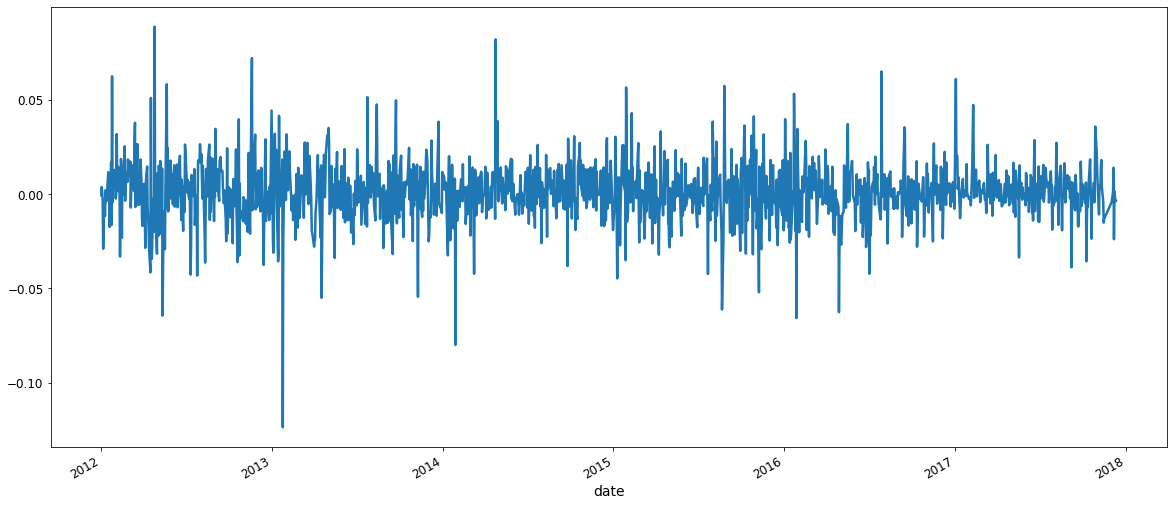

In [21]:
# Grabbing data from January 1st, 2012 i,e past 6 years

df = comp_stocks.loc['2012-01-01':]
df['stocks'].plot(lw=2.5, figsize=(20,9));

In [79]:
# Instantiating the model using SARIMAX, the optimal p, d, q values, and a seasonal order based on 12 months/year.
#importing statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(comp_stocks['stocks'],
                                order=(6, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

# Fitting the model
SARIMAX_results = model.fit()
print(SARIMAX_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0375      0.021      1.778      0.075      -0.004       0.079
ar.L2          0.0083      0.022      0.373      0.709      -0.036       0.052
ar.L3         -0.0704      0.022     -3.215      0.001      -0.113      -0.027
ar.L4          0.0543      0.021      2.578      0.010       0.013       0.096
ar.L5         -0.0089      0.023     -0.393      0.694      -0.053       0.036
ar.L6         -0.0135      0.020     -0.681      0.496      -0.053       0.025
ma.L1         -1.0001      0.127     -7.904      0.000      -1.248      -0.752
sigma2         0.0005   6.54e-05      7.805      0.000       0.000       0.001


# Plot_diagnostics

Fitting seasonal ARIMA models,

It is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated.

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

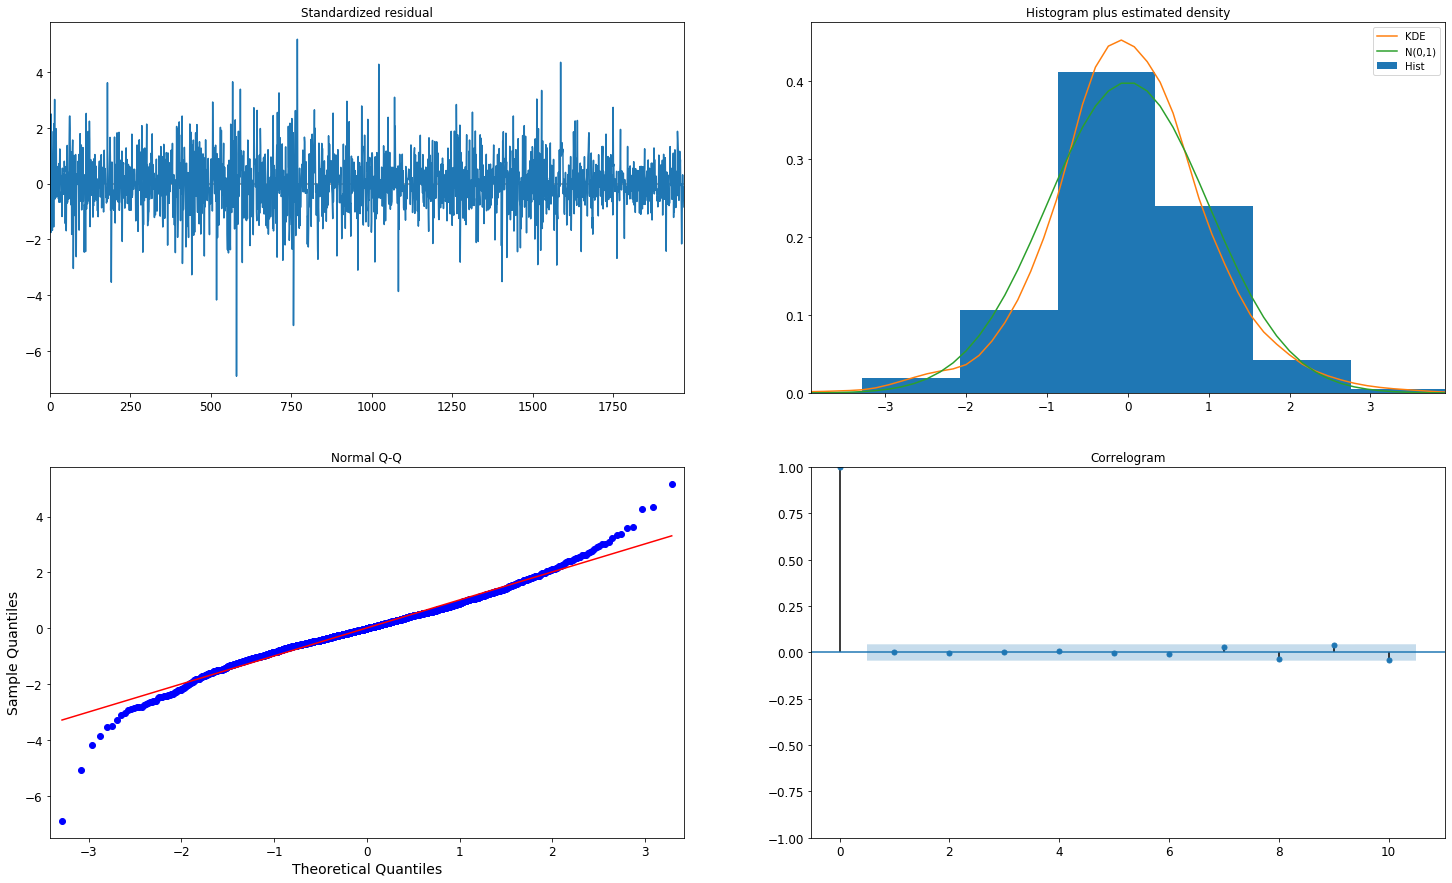

In [80]:
SARIMAX_results.plot_diagnostics(figsize=(25, 15))
plt.show()

# Prediction and Forecasting using SARIMA

In [81]:
# Getting model's predictions of the in-sample data, rounding to two decimal places for price.

SARIMAX_predictions = round(SARIMAX_results.predict(), 2)

# Creating a dataframe of the date index and predictions

SARIMAX_preds = pd.DataFrame(list(zip(list(SARIMAX_predictions.index),
                                      list(SARIMAX_predictions))),
                             columns=['Date','Predicted_comp_stocks']).set_index('Date')

# Merging the original dataframe with predictions for comparison

SARIMAX_predicted_data = pd.merge(df[1:], SARIMAX_preds, left_index=True, right_index=True)

SARIMAX_predicted_data.head()

,stocks,Predicted_comp_stocks
2012-01-03,0.003742,-0.00
2012-01-05,-0.003168,0.01
2012-01-06,-0.028976,0.00
2012-01-08,-0.006467,0.03
2012-01-10,-0.011558,-0.00


In [82]:
# Getting 3 years for forecasts 

SARIMAX_forecast = round(SARIMAX_results.forecast(steps = 1100), 2)


# Creating an index from 2017-12-01 to 3 years out, then putting it all together into a SARIMAX_forecast dataframe

idx = pd.date_range('2017-12-01', '2021-01-01')

SARIMAX_forecast = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecast))),
                             columns=['Date','Forecasted_comp_stocks']).set_index('Date')

SARIMAX_forecast.head()

,Forecasted_comp_stocks
Date,
2017-12-01,0.02
2017-12-02,0.00
2017-12-03,-0.00
2017-12-04,-0.02
2017-12-05,-0.01


# Prediction and Forecasting Plots

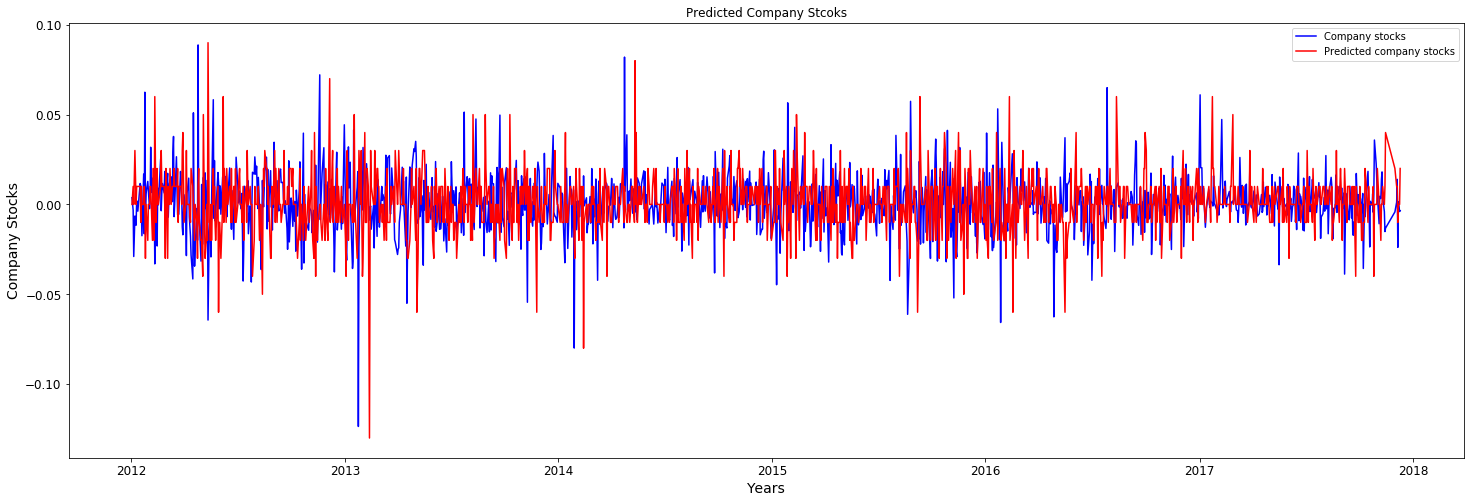

In [93]:
fig=plt.figure(figsize=[25,8])
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_data['stocks'],c='b',label='Company stocks')
ax.plot(SARIMAX_predicted_data['Predicted_comp_stocks'],c='r', label='Predicted company stocks')

plt.legend(loc='best')
plt.ylabel('Company Stocks')
plt.xlabel('Years')
plt.title('Predicted Company Stcoks')
plt.draw()

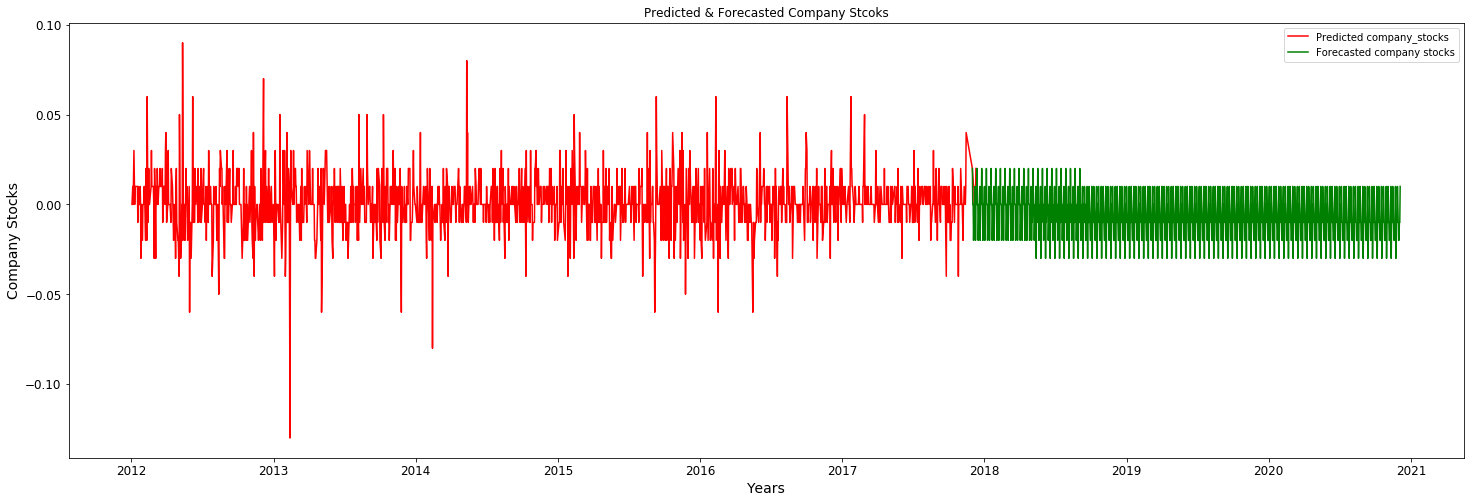

In [94]:
fig=plt.figure(figsize=[25,8])
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_data['Predicted_comp_stocks'],c='r', label='Predicted company_stocks')
ax.plot(SARIMAX_forecast['Forecasted_comp_stocks'],c='g', label='Forecasted company stocks')

plt.legend(loc='best')
plt.ylabel('Company Stocks')
plt.xlabel('Years')
plt.title('Predicted & Forecasted Company Stcoks')
plt.draw()

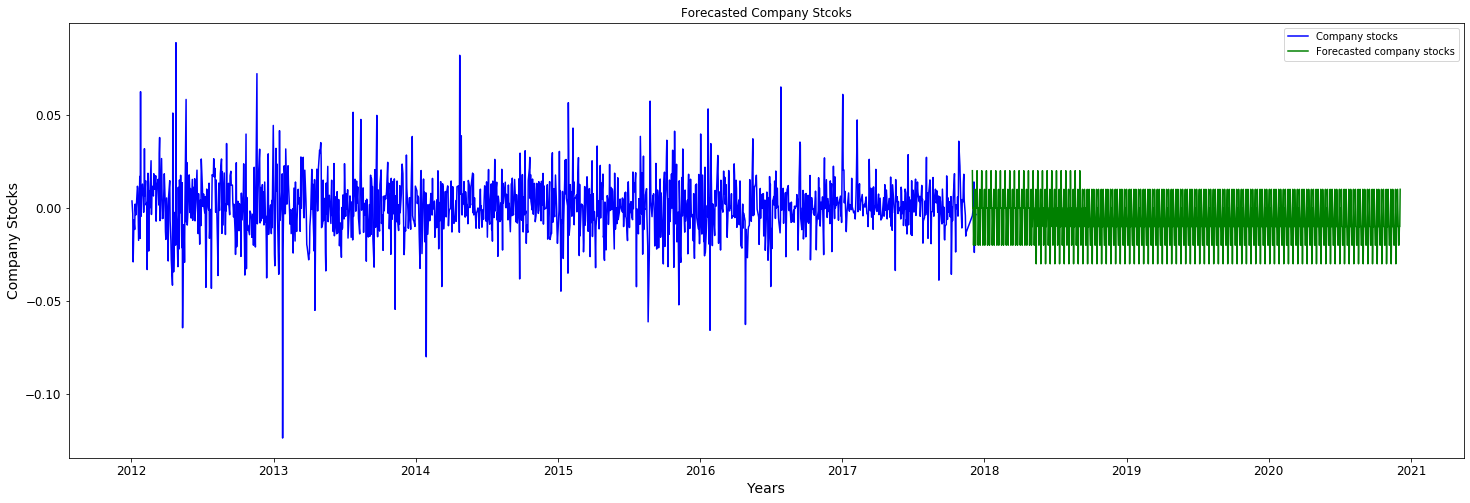

In [95]:
fig=plt.figure(figsize=[25,8])
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_data['stocks'],c='b',label='Company stocks')
ax.plot(SARIMAX_forecast['Forecasted_comp_stocks'],c='g', label='Forecasted company stocks')

plt.legend(loc='best')
plt.ylabel('Company Stocks')
plt.xlabel('Years')
plt.title('Forecasted Company Stcoks')
plt.draw()

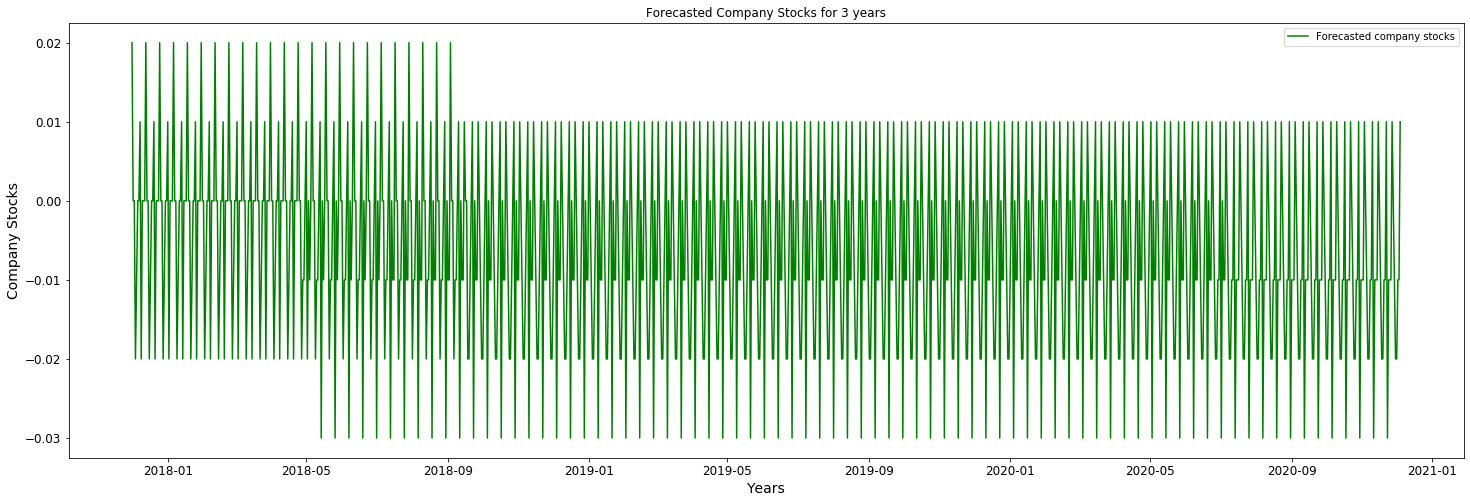

In [96]:
fig=plt.figure(figsize=[25,8])
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_forecast['Forecasted_comp_stocks'],c='g', label='Forecasted company stocks')

plt.legend(loc='best')
plt.ylabel('Company Stocks')
plt.xlabel('Years')
plt.title('Forecasted Company Stocks for 3 years')
plt.draw()

# Conclusion

Company stocks forecatsed for next 3 years as shown above in the graph

first 9 months stocks ranges in 0.02 to -0.02 after that to drops and ranges from 0.01 to -0.03